# 연관관계분석

 상품별로 어떤 연관성이 묶여서 구매되는 경향이 있는지 파악
 market basket analytics

 군집분석 : 각 사람마다 개체마다의 연관성을 묶어서 (행, 개체들을 유사하게 묶음) ->거리개념

 연관관계 분석 : 열단위로 분석 -> 상품들간의 관계를 분석(열, 변수, 상품간의 연관성을 묶음) -> 조건부확률의 개념


# 연관 규칙의 예

100명의 고객이 있다고 가정합니다. 그 중 10명은 우유를, 8명은 버터를, 6명은 둘 다 구매했습니다.

우유 구매 => 버터 구매

지지도 = P(우유 & 버터) = 6/100 = 0.06   # 해당 규칙은 전체 대비 6%의 확률로 일어남

신뢰도 = 지지도/P(버터) = 0.06/0.08 = 0.75 # 선행변수를 구매하면 후행변수를 구매할 확률은 75%임

향상도 = 신뢰도/P(우유) = 0.75/0.10 = 7.5 # 규칙이 없을때와 비교해 7.5배로 규칙이 일어남

참고: 이 예는 매우 작습니다. 실제로 규칙은 통계적으로 중요한 것으로 간주되기 전에 수백 개의 트랜잭션을 지원해야 하며 데이터 세트에는 종종 수천 또는 수백만 개의 트랜잭션이 포함됩니다.

# 지지도(support) : 교사건/

빈발 아이템 세트에 기초하여 후보규칙들의 집합결정/

apriori가 대표적 알고리즘/

많이 팔리는 물건을 체크/


# 신뢰도(confidence) : 조건부확률 /

조건을 줬을때 상품이 팔리는 확률 -> 규칙


# 향상도(lift) :  조건이 없을때와 조건을 줬을때의 상대적인 비율





# apriori 

연관 규칙을 찾아주는 알고리즘 중 가장 먼저 개발

연관성 규칙의 첫번째 단계는 아이템들 간의 연관성을 나타내기 위한 후보가 되는 모든 규칙들을 생성

단일 아이템 세트 -> 2개로 된 아이템 세트 -> 3개로 된 아이템 세트 ...

이 중 높은 빈돌르 갖는 조합(빈발 아이템 세트:frequent item sets)를 찾아내는 것

# 지지도(support) = 교사건 = 교집합
확률의 교사건

전체 거래 중 조건부(a)와 결론부(b)를 모두 포함하는 거래의 비율

발생할 가능성이 높아야함

# 신뢰도 

조건부 확률

연관 규칙의 강도 (urle strength)

조건부 아이템 (a)를 구매한 경우, 이 중에서 얼마나 결론부 아이템(b)를 구매할 것인지를 의미




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder #원핫인코딩을 해줌 
from mlxtend.frequent_patterns import apriori #빈발아이템 규칙
from mlxtend.frequent_patterns import association_rules #?



In [ ]:
# 데이터 가져오기
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/연관관계/Groceries_dataset.csv')
print(df)

       Member_number        Date            itemDescription
0               1808  21-07-2015             tropical fruit
1               2552  05-01-2015                 whole milk
2               2300  19-09-2015                  pip fruit
3               1187  12-12-2015           other vegetables
4               3037  01-02-2015                 whole milk
5               4941  14-02-2015                 rolls/buns
6               4501  08-05-2015           other vegetables
7               3803  23-12-2015                 pot plants
8               2762  20-03-2015                 whole milk
9               4119  12-02-2015             tropical fruit
10              1340  24-02-2015               citrus fruit
11              2193  14-04-2015                       beef
12              1997  21-07-2015                frankfurter
13              4546  03-09-2015                    chicken
14              4736  21-07-2015                     butter
15              1959  30-03-2015      fr

In [ ]:
# 데이터 타입 확인
df.info() , df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
Member_number      38765 non-null int64
Date               38765 non-null object
itemDescription    38765 non-null object
dtypes: int64(1), object(2)
memory usage: 908.6+ KB


(None, Index(['Member_number', 'Date', 'itemDescription'], dtype='object'))

In [ ]:
# 아이디를 숫자 타입으로 변환
df['Member_number'] = pd.to_numeric(df['Member_number'])

In [ ]:
# 데이터 확인
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# null 확인
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
#시간순으로 정렬
df = df.sort_values(by='Date')
print(df)

       Member_number        Date            itemDescription
13581           4942  01-01-2014                     butter
9557            1922  01-01-2014             tropical fruit
30568           3797  01-01-2014                 whole milk
13449           2237  01-01-2014              bottled water
9172            2226  01-01-2014                    sausage
26193           2943  01-01-2014             flower (seeds)
9132            2351  01-01-2014                    cleaner
27549           2974  01-01-2014         whipped/sour cream
13242           3942  01-01-2014           other vegetables
13247           2610  01-01-2014             hamburger meat
15535           1659  01-01-2014        specialty chocolate
37418           3956  01-01-2014                  chocolate
32767           2610  01-01-2014              domestic eggs
12744           1789  01-01-2014             hamburger meat
32762           3942  01-01-2014      Instant food products
31487           1381  01-01-2014        

In [ ]:
# 일자별로 그룹화해서  일별 판매 추이를 확인


# series일 경우 정렬을 index로 하고싶으면 아래와 같이 할것
# itemDescription의 개수를 날짜 순으로 정렬하고 싶을때
print(df.groupby(['Date'])['itemDescription'].count().sort_index())

# itemDescription의 개수를 개수의 내림차순으로 정렬하고 싶을때
# 컬럼이 하나인 series는 by를 쓸 수 없다 
print(df.groupby(['Date'])['itemDescription'].count().sort_values(ascending=False))




# # 컬럼이 여러개일 경우 by를 통해 기준 열을 지정
# top_customer = df.groupby(['customer_name']).sum().sort_values(by='sales',ascending=False).head(20)


Date
01-01-2014    48
01-01-2015    48
01-02-2014    62
01-02-2015    61
01-03-2014    54
01-03-2015    76
01-04-2014    64
01-04-2015    83
01-05-2014    44
01-05-2015    68
01-06-2014    32
01-06-2015    33
01-07-2014    33
01-07-2015    57
01-08-2014    49
01-08-2015    71
01-09-2014    64
01-09-2015    22
01-10-2014    60
01-10-2015    53
01-11-2014    33
01-11-2015    50
01-12-2014    40
01-12-2015    54
02-01-2014    55
02-01-2015    35
02-02-2014    44
02-02-2015    32
02-03-2014    64
02-03-2015    75
              ..
30-04-2014    58
30-04-2015    91
30-05-2014    76
30-05-2015    39
30-06-2014    46
30-06-2015    49
30-07-2014    54
30-07-2015    59
30-08-2014    42
30-08-2015    55
30-09-2014    49
30-09-2015    87
30-10-2014    67
30-10-2015    30
30-11-2014    46
30-11-2015    61
30-12-2014    46
30-12-2015    53
31-01-2014    64
31-01-2015    69
31-03-2014    46
31-03-2015    54
31-05-2014    75
31-05-2015    47
31-07-2014    57
31-07-2015    63
31-08-2014    47
31-08-201

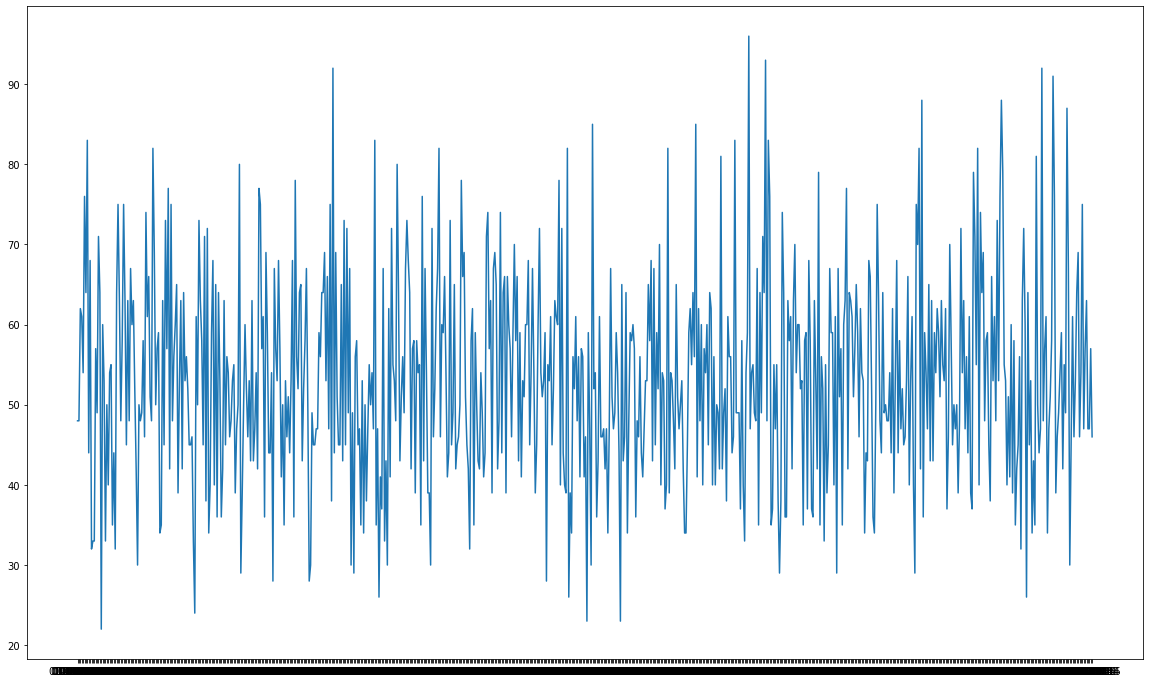

In [ ]:
#시계열 순으로 데이터의 흐름 시각화
time_y = df.groupby(['Date'])['itemDescription'].count().sort_index()
time_x = time_y.index

plt.figure(figsize=(20,12))
plt.plot(time_x,time_y)
plt.show()


In [ ]:
d = df.set_index(['Date'])
d

,Member_number,itemDescription
Date,,
01-01-2014,4942,butter
01-01-2014,1922,tropical fruit
01-01-2014,3797,whole milk
01-01-2014,2237,bottled water
01-01-2014,2226,sausage
01-01-2014,2943,flower (seeds)
01-01-2014,2351,cleaner
01-01-2014,2974,whipped/sour cream
01-01-2014,3942,other vegetables


In [ ]:
# 인덱스를 날짜데이터로 변환
d.index = pd.to_datetime(d.index)

In [ ]:
# 전체 팔린 개별 아이템의 수, 전체 날짜, 전체 월, 일별 평균 팔린 아이템의 개수, 중복없는 아이템의 개수

total_items = len(d) #itemDescription은 한개의 품목만 저장되므로 데이터프레임의 길이는 전체 팔린 개수와 동일
total_days = len(np.unique(d.index.date)) # datetime으로 변경했기 때문에 date를 붙임으로써 일자를 뽑아낼 수 있음
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days # 팔린 전체 아이템/일자
unique_items = d.itemDescription.unique().size # 이면 개별 품목을 리스트로 저장

print('상품 구색 수 : {}'.format(unique_items))
print('{}달에 걸쳐, {}일동안 총 {}개의 아이템을 판매함.'.format(total_months,total_days,total_items))
print('일 평균 {}개의 아이템을 판매'.format(average_items))


상품 구색 수 : 167
12달에 걸쳐, 728일동안 총 38765개의 아이템을 판매함.
일 평균 53.24862637362637개의 아이템을 판매


       Member_number  itemDescription
month                                
1               3333             3333
2               3032             3032
3               3283             3283
4               3172             3172
5               3335             3335
6               3316             3316
7               3268             3268
8               3498             3498
9               2963             2963
10              3218             3218
11              3273             3273
12              3074             3074


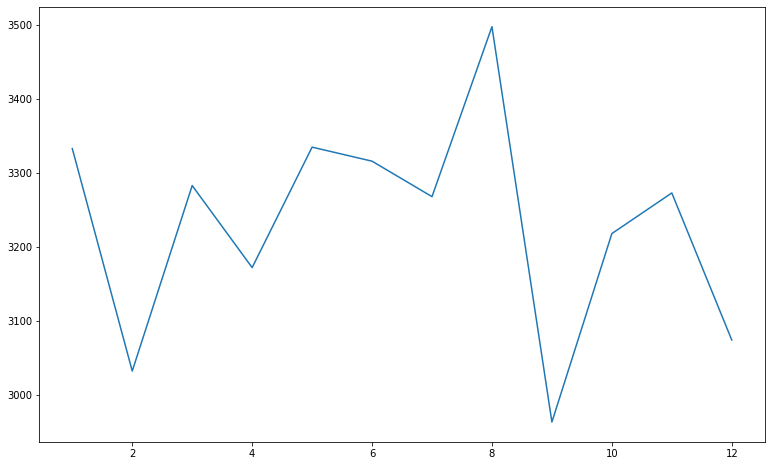

In [ ]:
# 월별 판매량 체크
d2 = d.copy()
d2['month'] = d2.index.month

dm = d2.groupby('month').count()
# print(dm.sum()) #38765
print(dm) #38765

plt.figure(figsize=(13,8))
fig =plt.plot(dm.index,dm['itemDescription'])

In [ ]:


print(d.resample("M")['itemDescription'].count()) #인덱스를 기준으로 월별로 리샘플링



Date
2014-01-31    1504
2014-02-28    1547
2014-03-31    1491
2014-04-30    1506
2014-05-31    1625
2014-06-30    1525
2014-07-31    1623
2014-08-31    1535
2014-09-30    1350
2014-10-31    1555
2014-11-30    1496
2014-12-31    1520
2015-01-31    1829
2015-02-28    1485
2015-03-31    1792
2015-04-30    1666
2015-05-31    1710
2015-06-30    1791
2015-07-31    1645
2015-08-31    1963
2015-09-30    1613
2015-10-31    1663
2015-11-30    1777
2015-12-31    1554
Freq: M, Name: itemDescription, dtype: int64


In [ ]:
 d['hour'] = d.index.hour
 d['weekday'] = d.index.weekday +1
# 0이 월요일 ~ 6이 일요일



In [ ]:
d['itemDescription'].value_counts()

whole milk                2502
other vegetables          1898
rolls/buns                1716
soda                      1514
yogurt                    1334
root vegetables           1071
tropical fruit            1032
bottled water              933
sausage                    924
citrus fruit               812
pastry                     785
pip fruit                  744
shopping bags              731
canned beer                717
bottled beer               687
whipped/sour cream         662
newspapers                 596
frankfurter                580
brown bread                571
domestic eggs              566
pork                       566
butter                     534
fruit/vegetable juice      518
beef                       516
curd                       514
margarine                  491
coffee                     476
frozen vegetables          425
chicken                    422
white bread                362
                          ... 
canned fruit                21
syrup   

In [ ]:

x = d['itemDescription'].value_counts().keys()
y = d['itemDescription'].value_counts().values

print(x)
print(y)

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'root vegetables', 'tropical fruit', 'bottled water', 'sausage',
       'citrus fruit',
       ...
       'whisky', 'salad dressing', 'rubbing alcohol', 'make up remover',
       'toilet cleaner', 'frozen chicken', 'bags', 'baby cosmetics',
       'kitchen utensil', 'preservation products'],
      dtype='object', length=167)
[2502 1898 1716 1514 1334 1071 1032  933  924  812  785  744  731  717
  687  662  596  580  571  566  566  534  518  516  514  491  476  425
  422  362  358  357  356  335  327  327  323  305  283  280  269  265
  263  256  254  252  251  240  238  227  225  220  220  219  212  210
  208  181  177  176  159  157  152  152  146  142  135  134  130  128
  122  121  118  116  106  103  102  100   98   93   92   92   89   85
   82   82   80   79   75   74   73   72   72   70   69   67   67   66
   64   61   60   60   60   51   50   49   48   48   46   46   45   44
   42   41   40   40   38

<BarContainer object of 167 artists>

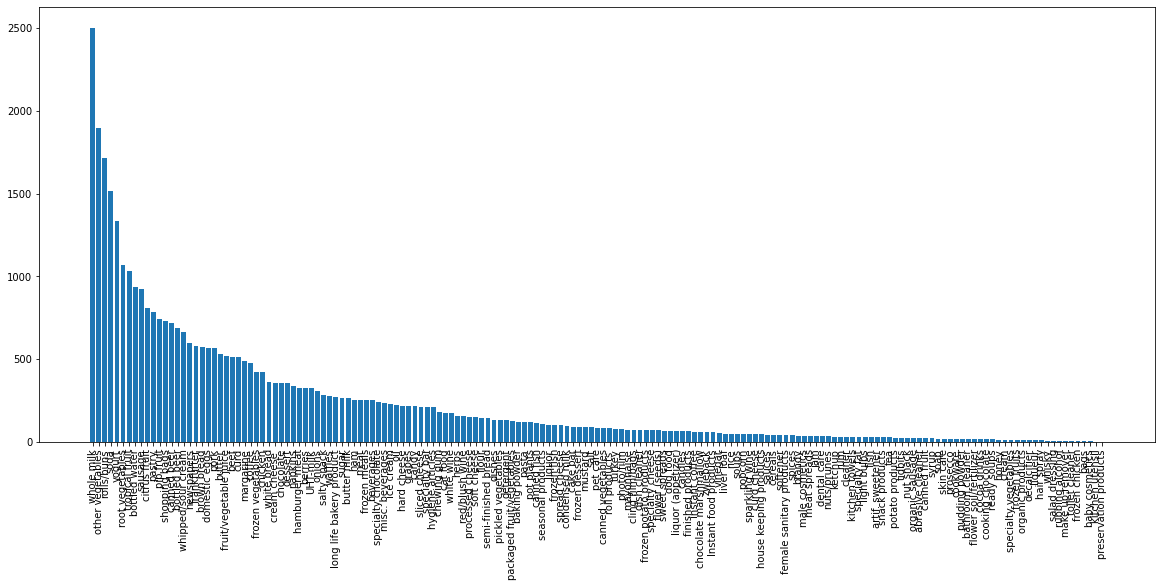

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.bar(x,y)

In [ ]:
# 동일 고객이 동일 일자로 구해 했을시 아이템을 합침
df_sum_item = df.groupby(['Member_number','Date'])['itemDescription'].sum()

In [ ]:
# 아이디가 1000인 구매 항목을 출력

filt = df['Member_number'] == 1000

print(df[filt])

       Member_number        Date      itemDescription
4843            1000  15-03-2015              sausage
8395            1000  15-03-2015           whole milk
24544           1000  15-03-2015               yogurt
20992           1000  15-03-2015  semi-finished bread
13331           1000  24-06-2014           whole milk
32851           1000  24-06-2014          salty snack
29480           1000  24-06-2014               pastry
18196           1000  24-07-2015      misc. beverages
2047            1000  24-07-2015          canned beer
22537           1000  25-11-2015     hygiene articles
6388            1000  25-11-2015              sausage
17778           1000  27-05-2015   pickled vegetables
1629            1000  27-05-2015                 soda


In [ ]:
# 아이템이 합쳐진 데이터프레임을 확인

df_sum_item

Member_number  Date      
1000           15-03-2015           sausagewhole milkyogurtsemi-finished bread
               24-06-2014                          whole milksalty snackpastry
               24-07-2015                           misc. beveragescanned beer
               25-11-2015                              hygiene articlessausage
               27-05-2015                               pickled vegetablessoda
1001           02-05-2015                                      curdfrankfurter
               07-02-2014                          whole milkrolls/bunssausage
               12-12-2014                                       sodawhole milk
               14-04-2015                                      beefwhite bread
               20-01-2015                    frankfurterwhipped/sour creamsoda
1002           09-02-2014                    other vegetablesfrozen vegetables
               26-04-2014                                     whole milkbutter
               26-04-2015 

In [ ]:
df_sum_item.values

array(['sausagewhole milkyogurtsemi-finished bread',
       'whole milksalty snackpastry', 'misc. beveragescanned beer', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

In [ ]:
pd.set_option('display.max_colwidth', -1)
# 컬럼 가로를 최대로 넓힘

In [ ]:
# tolist를 통해 동일한 위치의 아이템을 묶음

transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]

In [ ]:
# 1.리스트 안에 그룹화한 데이터 프레임을 넣는다
# Member_number , Date, 데이터프레임 의 정보가 순서대로 리스트에 들어감
list(df.groupby(['Member_number','Date']))[0]

((1000, '15-03-2015'),        Member_number        Date      itemDescription
 4843   1000           15-03-2015  sausage            
 8395   1000           15-03-2015  whole milk         
 24544  1000           15-03-2015  yogurt             
 20992  1000           15-03-2015  semi-finished bread)

In [ ]:
# 2. 데이터프레임의 정보에 접근 [1]번째 위치

list(df.groupby(['Member_number','Date']))[0][1]

,Member_number,Date,itemDescription
4843,1000,15-03-2015,sausage
8395,1000,15-03-2015,whole milk
24544,1000,15-03-2015,yogurt
20992,1000,15-03-2015,semi-finished bread


In [ ]:
# 3. 아이템 리스트가 들어있는 itemDescription컬럼으로 이동

list(df.groupby(['Member_number','Date']))[0][1]['itemDescription']


4843     sausage            
8395     whole milk         
24544    yogurt             
20992    semi-finished bread
Name: itemDescription, dtype: object

In [ ]:
# 4. tolist()를 통해 해당 데이터프레임의 컬럼안에 있는 모든데이터를 리스트로 합침

list(df.groupby(['Member_number','Date']))[0][1]['itemDescription'].tolist()

['sausage', 'whole milk', 'yogurt', 'semi-finished bread']

In [ ]:
transactions

[['sausage', 'whole milk', 'yogurt', 'semi-finished bread'],
 ['whole milk', 'salty snack', 'pastry'],
 ['misc. beverages', 'canned beer'],
 ['hygiene articles', 'sausage'],
 ['pickled vegetables', 'soda'],
 ['curd', 'frankfurter'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['soda', 'whole milk'],
 ['beef', 'white bread'],
 ['frankfurter', 'whipped/sour cream', 'soda'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['sugar', 'tropical fruit'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['cling film/bags', 'dish cleaner'],
 ['frozen fish', 'canned beer'],
 ['hygiene articles', 'other vegetables'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['chocolate', 'rolls/buns', 'red/blush wine'],
 ['shopping bags', 'other vegetables'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['pastry', 'root vegetables', 'w

In [ ]:
#mlxtend 임포트


from mlxtend.preprocessing import  TransactionEncoder

In [ ]:
te = TransactionEncoder()

te_tf = te.fit_transform(transactions) #원핫인코딩으로 변환시킹

In [ ]:
# columns를 보여줌 _필요
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [ ]:
# tf로 아이템의 원핫인코딩을 나타냄
te_tf

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
transactions = pd.DataFrame(te_tf,columns=te.columns_) # 컬럼명은 아이템으로, 01 로 표현한 데이터프레임을 생성

transactions.iloc[0]

Instant food products    False
UHT-milk                 False
abrasive cleaner         False
artif. sweetener         False
baby cosmetics           False
bags                     False
baking powder            False
bathroom cleaner         False
beef                     False
berries                  False
beverages                False
bottled beer             False
bottled water            False
brandy                   False
brown bread              False
butter                   False
butter milk              False
cake bar                 False
candles                  False
candy                    False
canned beer              False
canned fish              False
canned fruit             False
canned vegetables        False
cat food                 False
cereals                  False
chewing gum              False
chicken                  False
chocolate                False
chocolate marshmallow    False
                         ...  
soap                     False
soda    

In [ ]:
transactions.describe()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


요소 또는 항목 간의 연관 규칙을 구성하기 위해, 알고리즘은 세 가지 중요한 요소인 
지지도, 신뢰도 및 향상도를 고려한다. 이러한 각 요인은 다음과 같이 설명됩니다.

# **지지도:**

항목 I의 지지도는 항목 I을 포함하는 거래 수 간의 총 거래 수에 대한 비율로 정의된다.

지지도(I)=I가 포함된 트랜잭션 수/총 트랜잭션 수



# **신뢰도:**

이는 항목 I1과의 거래 비율로 측정되며, 항목 I2도 나타난다. 
거래에서 두 항목 I1과 I2 사이의 신뢰도는 항목 I1과 I2를 모두 포함하는 거래의 총수를 I1을 포함하는 거래의 총수로 나눈 값으로 정의된다.

신뢰도(I1->I2)= I1 및 I2/(총 I1 포함 거래 수)


# **향상도**: 

향상도는 신뢰도와 지지 사이의 비율로 다음과 같이 표현됩니다.

향상도(I1->I2)=신뢰도(I1->I2)/지지도(I2)

In [ ]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
freq_items.sort_values('support',ascending=False)

# 지지도가 높을 수록 해당 아이템이 전체 아이템대비 많이 팔렸음을 의미

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x : len(x))  # lambda 입력 : 출력// 입력값을 출력값으로 변환해줌

In [ ]:
freq_items.sort_values('length',ascending=False)


,support,itemsets,length
749,0.001470,"(yogurt, sausage, whole milk)",3
745,0.001136,"(rolls/buns, sausage, whole milk)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(soda, whole milk, other vegetables)",3
744,0.001136,"(yogurt, whole milk, other vegetables)",3
741,0.001136,"(soda, rolls/buns, other vegetables)",3
746,0.001002,"(soda, rolls/buns, whole milk)",3
747,0.001337,"(yogurt, rolls/buns, whole milk)",3
748,0.001069,"(soda, sausage, whole milk)",3
502,0.002205,"(yogurt, fruit/vegetable juice)",2


In [ ]:
# 3개의 조합을 출력
filt = freq_items['length'] == 3
freq_items[filt]

,support,itemsets,length
741,0.001136,"(soda, rolls/buns, other vegetables)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(soda, whole milk, other vegetables)",3
744,0.001136,"(yogurt, whole milk, other vegetables)",3
745,0.001136,"(rolls/buns, sausage, whole milk)",3
746,0.001002,"(soda, rolls/buns, whole milk)",3
747,0.001337,"(yogurt, rolls/buns, whole milk)",3
748,0.001069,"(soda, sausage, whole milk)",3
749,0.001470,"(yogurt, sausage, whole milk)",3


In [ ]:
freq_items.head(10)


,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [ ]:
freq_items.tail(10)


,support,itemsets,length
740,0.011161,"(yogurt, whole milk)",2
741,0.001136,"(soda, rolls/buns, other vegetables)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(soda, whole milk, other vegetables)",3
744,0.001136,"(yogurt, whole milk, other vegetables)",3
745,0.001136,"(rolls/buns, sausage, whole milk)",3
746,0.001002,"(soda, rolls/buns, whole milk)",3
747,0.001337,"(yogurt, rolls/buns, whole milk)",3
748,0.001069,"(soda, sausage, whole milk)",3
749,0.001470,"(yogurt, sausage, whole milk)",3


In [ ]:
#연관규칙 출력, confidence를 기준으로 룰 생성 -> lift도 가능
rules = association_rules(freq_items,metric='confidence',min_threshold=0.001)
rules.head()

# antecedents을 샀을경우 consequents를 살 확률


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009


In [ ]:
#향상도 순으로 출력

rules2 = association_rules(freq_items,metric='lift',min_threshold=0.01)
rules2 = rules2[['antecedents','consequents','support','confidence','lift']]
rules2 = rules2.sort_values(by='lift',ascending=False)
rules2.head(20)

,antecedents,consequents,support,confidence,lift
1236,(sausage),"(yogurt, whole milk)",0.001470,0.024363,2.182917
1233,"(yogurt, whole milk)",(sausage),0.001470,0.131737,2.182917
1234,"(sausage, whole milk)",(yogurt),0.001470,0.164179,1.911760
1235,(yogurt),"(sausage, whole milk)",0.001470,0.017121,1.911760
474,(specialty chocolate),(citrus fruit),0.001403,0.087866,1.653762
475,(citrus fruit),(specialty chocolate),0.001403,0.026415,1.653762
1232,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866
1237,(whole milk),"(yogurt, sausage)",0.001470,0.009310,1.619866
618,(tropical fruit),(flour),0.001069,0.015779,1.617141
619,(flour),(tropical fruit),0.001069,0.109589,1.617141


In [ ]:
# 영화 데이터를 덤핑
import pickle

pickle.dump(rules2, open('market_basket_analysis.pickle','wb'))

In [ ]:
# 선행변수의 길이를 출력
rules2['ant_len']  = rules2['antecedents'].apply(lambda x : len(x))
rules2

,antecedents,consequents,support,confidence,lift,ant_len
1236,(sausage),"(yogurt, whole milk)",0.001470,0.024363,2.182917,1
1233,"(yogurt, whole milk)",(sausage),0.001470,0.131737,2.182917,2
1234,"(sausage, whole milk)",(yogurt),0.001470,0.164179,1.911760,2
1235,(yogurt),"(sausage, whole milk)",0.001470,0.017121,1.911760,1
474,(specialty chocolate),(citrus fruit),0.001403,0.087866,1.653762,1
475,(citrus fruit),(specialty chocolate),0.001403,0.026415,1.653762,1
1232,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866,2
1237,(whole milk),"(yogurt, sausage)",0.001470,0.009310,1.619866,1
618,(tropical fruit),(flour),0.001069,0.015779,1.617141,1
619,(flour),(tropical fruit),0.001069,0.109589,1.617141,1


100명의 고객이 있다고 가정합니다. 그 중 10명은 우유를, 8명은 버터를, 6명은 둘 다 구매했습니다.

우유 구매 => 버터 구매

지지도 = P(우유 & 버터) = 6/100 = 0.06 # 해당 규칙은 전체 대비 6%의 확률로 일어남

100명 중 우유와 버터를 같이 구매한 사람은 6명


신뢰도 = 지지도/P(버터) = 0.06/0.08 = 0.75 # 선행변수를 구매하면 후행변수를 구매할 확률은 75%임

버터를 구매한 전체 고객 중 우유를 같이 구매한 사람은 75%


향상도 = 신뢰도/P(우유) = 0.75/0.10 = 7.5 # 규칙이 없을때와 비교해 7.5배로 규칙이 일어남

우유를 구매한 전체 고객 중 우유를 구매하면 버터를 구매할 확률이 7.5배


support(교집합) : 전체 판매중 조건이 팔린 확률
confidence(조건부확률) : 선행변수를 구매하면 후행변수를 구매할 확률
lift(효과) : 아무 조건없이 후행변수를 구매한 고객 대비 선행변수를 구매하면 후행변수를 구매할 확률, 

In [ ]:

# lift 가 2 이상이고 선행변수가 두개 이하
rules2[(rules2['ant_len'] <=2) &
       (rules2['lift'] >2)]


# confidence 가 20% 이상이고 선행변수가 두개 이하
rules2[(rules2['ant_len'] <=2) &
       (rules2['confidence'] > 0.2)]



# rules2[(rules2['ant_len'] <=2) &
#        (rules2['confidence'] >0.009) &
#        (rules2['support'] >0.002) &
#        (rules2['lift'] >2)]

,antecedents,consequents,support,confidence,lift,ant_len
1232,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866,2
1208,"(rolls/buns, sausage)",(whole milk),0.001136,0.212500,1.345594,2


In [ ]:
# # 특정 규칙 확인

rules2[rules2['antecedents'] == {'sausage','yogurt'}] # 소시지와 요거트를 같이 구매한 사람은 다른 어떤 품목을 또 같이 살까?
rules2[rules2['antecedents'] == {'whole milk'}] # 우유를 구매하는 고객은 다른 어떤 제품을 같이 살까



,antecedents,consequents,support,confidence,lift,ant_len
1237,(whole milk),"(yogurt, sausage)",0.001470,0.009310,1.619866,1
1213,(whole milk),"(rolls/buns, sausage)",0.001136,0.007194,1.345594,1
1231,(whole milk),"(soda, sausage)",0.001069,0.006771,1.138374,1
1109,(whole milk),(semi-finished bread),0.001671,0.010580,1.114825,1
1225,(whole milk),"(yogurt, rolls/buns)",0.001337,0.008464,1.082428,1
585,(whole milk),(detergent),0.001403,0.008887,1.030824,1
729,(whole milk),(ham),0.002740,0.017351,1.014142,1
148,(whole milk),(bottled beer),0.007151,0.045281,0.999330,1
655,(whole milk),(frozen fish),0.001069,0.006771,0.993287,1
315,(whole milk),(candy),0.002139,0.013542,0.942468,1


In [ ]:
#신뢰도 순으로 

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1208,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1220,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
584,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814
728,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659
149,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
654,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743


In [ ]:
rules.sort_values

<bound method DataFrame.sort_values of                    antecedents               consequents  antecedent support  \
0     (UHT-milk)                (bottled water)           0.021386             
1     (bottled water)           (UHT-milk)                0.060683             
2     (UHT-milk)                (other vegetables)        0.021386             
3     (other vegetables)        (UHT-milk)                0.122101             
4     (UHT-milk)                (rolls/buns)              0.021386             
5     (rolls/buns)              (UHT-milk)                0.110005             
6     (UHT-milk)                (root vegetables)         0.021386             
7     (root vegetables)         (UHT-milk)                0.069572             
8     (UHT-milk)                (sausage)                 0.021386             
9     (sausage)                 (UHT-milk)                0.060349             
10    (soda)                    (UHT-milk)                0.097106             
1

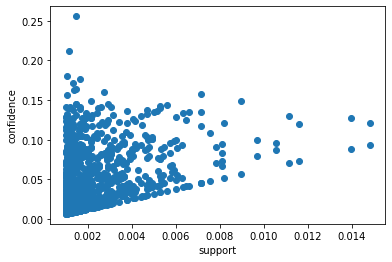

In [ ]:
su = rules['support'] 
co = rules['confidence'] 
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(su,co)
plt.show()

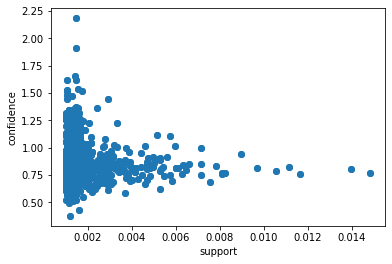

In [ ]:
su = rules['support'] 
li = rules['lift'] 
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(su,li)
plt.show()